# Twitter 사용자 감성 분석 #



<br><br>


**Twitter 사용자들의 감정을 분석해봅니다**

- Twitter API를 등록하고
- 분석에 필요한 모듈(tweepy, textblop)등을 받은후에
- 트윗들을 분석해 사죵자들의 감정을 분석해봅니다


In [1]:
from textblob import TextBlob
import nltk
import tweepy
import config
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 커스터머키
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
# 엑세스토큰
access_token = config.access_token
access_token_secret = config.access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**MLB를 100개 검색해봅니다**

- polarity < 0 인 경우는 negative로 분류
- polarity = 0 인 경우는 netural(중립)으로 분류
- polarity >= 0인 경우는 positive로 분류합니다

## 모두 더한후 평균을 냅니다 ##

In [2]:
public_tweets = api.search('MLB', len='en', count=100)

positive_polarity_count=0
negative_polarity_count=0
netural_polarity_count=0
subjectivity_count=0


for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    
    if analysis.sentiment.polarity < 0:
        negative_polarity_count += 1
    elif analysis.sentiment.polarity:
        netural_polarity_count += 1
    else:
        positive_polarity_count += 1
    subjectivity_count += 1
    
    print(analysis.sentiment)
    print('-'*70)
print("Average of Twitt in 'MLB' negatve is :", negative_polarity_count, "%")
print("Average of Twitt in 'MLB' positive is :", positive_polarity_count, "%")
print("Average of Twitt in 'MLB' netural is :", netural_polarity_count, "%")
print("Average of Twitt in 'MLB' subjectivity is :",subjectivity_count, "%")

Sentiment(polarity=-0.15000000000000002, subjectivity=0.4)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.020833333333333332, subjectivity=0.19999999999999998)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.14285714285714285)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.3333333333333333, subjectivity=0.7666666666666666)
-------------------------------------------------------

Sentiment(polarity=1.0, subjectivity=1.0)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)
----------------------------------------------------------------------
Sentiment(polarity=0.5, subjectivity=0.5)
----------------------------------------------------------------------
Sentiment(polarity=-0.11666666666666665, subjectivity=0.6)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
----------------------------------------------------------------------
Sentiment(polari

## matplot을 이용해 간단한 plot 차트를 만들어봅니다 ##

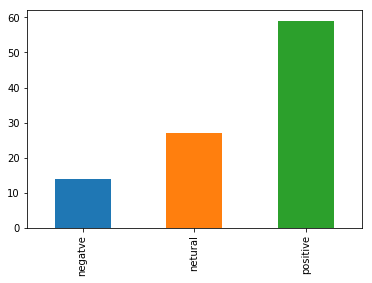

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.DataFrame([{'negatve' : negative_polarity_count,  # 그래프를 그리기 위해 DataFrame으로 바꿉니다
                   'positive' : positive_polarity_count,
                   'netural' : netural_polarity_count,}]) 

df.mean().plot(kind='bar')

# 이번에는 게임을 분석해 봅시다


- 상위권 게임들의 실제 순위와
- Twitter의 감정분석 순위와 얼마나 관련이 있는지 알아봅시다

In [4]:
#실제 게임순위 1~20위중 무작위로 추출

online_game = ['League of Legends', 'Counter Strike', 'Fortnite', 'Hearthstone', 'Minecraft', 'BATTLEGROUNDS', 'Overwatch',
              'Star Craft', 'GTA', 'World Of Tanks', 'Dota 2', 'Call of Duty', 'Battlefield']


total_polarity = []
total_subjectivity = []

for game in online_game:
    game_tweet = api.search(game, len='en', count=100)
    
    polarity_score = 0
    subjectivity_score = 0
    
    for tweet in game_tweet:
        game = TextBlob(tweet.text)
        
        polarity_score += game.sentiment.polarity
        subjectivity_score += game.sentiment.subjectivity
        
    total_polarity.append(polarity_score)
    total_subjectivity.append(subjectivity_score)

In [5]:
for i in range(len(online_game)):
    print('{}\ntotal polarity는 : {} \ntotal subjectivity는 : {} 입니다'.format(online_game[i], total_polarity[i], total_subjectivity[i]))
    print('-'*50)

League of Legends
total polarity는 : 6.207160894660896 
total subjectivity는 : 28.499206349206343 입니다
--------------------------------------------------
Counter Strike
total polarity는 : 0.18798701298701295 
total subjectivity는 : 12.628571428571432 입니다
--------------------------------------------------
Fortnite
total polarity는 : 12.289624143217893 
total subjectivity는 : 27.37438672438673 입니다
--------------------------------------------------
Hearthstone
total polarity는 : 12.964451119265572 
total subjectivity는 : 31.30063973063973 입니다
--------------------------------------------------
Minecraft
total polarity는 : 11.077854775432892 
total subjectivity는 : 23.309220779220762 입니다
--------------------------------------------------
BATTLEGROUNDS
total polarity는 : 7.9576941287878835 
total subjectivity는 : 35.045303030303025 입니다
--------------------------------------------------
Overwatch
total polarity는 : 3.315909090909091 
total subjectivity는 : 20.79022727272727 입니다
-----------------------------

In [10]:
#딕셔너리를 만들어 Pandas의 DataFrame으로 바꿔줍니다

data = {'game_name' : [],
       'polarity' : [],
       'subjectivity' : []}

for i in range(len(online_game)):
    data['game_name'].append(online_game[i])
    data['polarity'].append(total_polarity[i])
    data['subjectivity'].append(total_subjectivity[i])
    
df = pd.DataFrame(data)

In [7]:
# ranking column에 실제 순위를 넣어줍니다

df['ranking'] = [1,2,3,4,5,6,7,20,10,11,12,16,18]

In [8]:
#완성된 DataFrame을 확인해 봅니다

df

,game_name,polarity,subjectivity,ranking
0,League of Legends,6.207161,28.499206,1
1,Counter Strike,0.187987,12.628571,2
2,Fortnite,12.289624,27.374387,3
3,Hearthstone,12.964451,31.300640,4
4,Minecraft,11.077855,23.309221,5
5,BATTLEGROUNDS,7.957694,35.045303,6
6,Overwatch,3.315909,20.790227,7
7,Star Craft,20.453680,39.278608,20
8,GTA,8.366414,17.017496,10
9,World Of Tanks,13.656250,26.499206,11


# Heatmap을 그려봅시다

- feature들 간의 상관관계를 알 수 있습니다
- Ranking에 porality보다 subjectivity가 더 큰 영향을 주고 있습니다

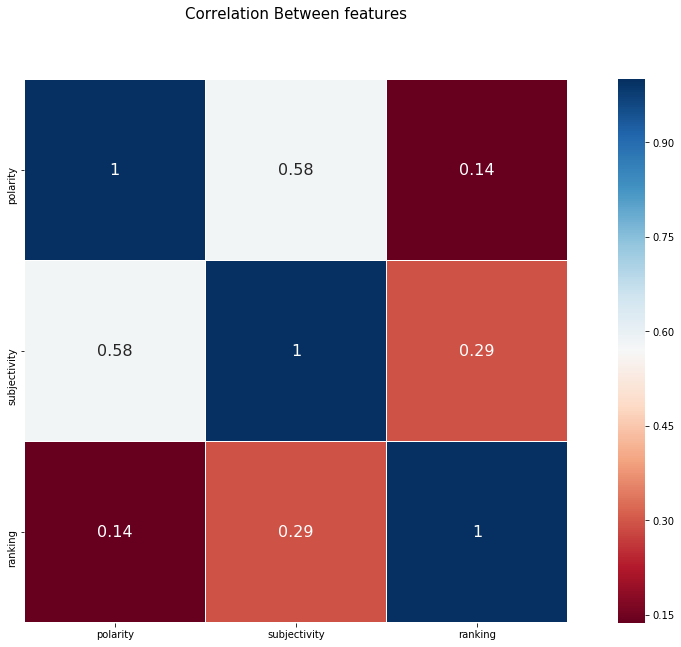

In [9]:
import seaborn as sns

heatmap_data = df[['polarity', 'subjectivity', 'ranking']]

colormap = plt.cm.RdBu
plt.figure(figsize=(18,10))
plt.title('Correlation Between features', size=15, y=1.1)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
